# Деревья решений

Деревья решений или решающие деревья (*decision trees*) - это модель машинного обучения, которая используется для решения задач классификации и регрессии. Такая модель имеет древовидную структуру, в которой каждый узел представляет собой тест на определенное условие, а каждая ветвь соответствует одному из возможных ответов на этот тест.

Дерево решений начинается с корневого узла, где находится вся выборка данных, и на каждом узле модель выбирает наиболее информативный признак для разделения данных на более чистые подгруппы. В результате получается дерево с листьями, которые соответствуют конечным классам или значениям регрессионной переменной.

Деревья решений имеют множество преимуществ, таких как простота интерпретации, возможность работы с категориальными признаками и обработки пропущенных значений. Однако они также могут страдать от проблем переобучения и неустойчивости к изменениям в данных.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Классификация
Произведем классификацию на данных iris. Первым делом произведем бинарную классификацию, затем произведем многоклассовую классификацию. Загрузим данные и упростим пространство признаков, оставив лишь признаки, представленные в двух колонках (с индексами, заданными в переменной `feature_indices`). Задачу сведем к бинарной классификации, где будут всего два класса (относится образец в выбранному виду или не относится). Первый класс будем называть <span style="color: limegreen"> "положительным"</span> $\oplus$, а второй - <span style="color: orange">"отрицательным" </span> $\ominus$. Похожие действия производились в файле sklearn_classification.ipynb.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()          # загрузка данных
X = iris["data"]            # извлекаются данные признков
y = iris["target"]          # извлекаются данные классов

### Бинарная классификация при двух признаках

In [10]:
# выбор пары признков из доступных (0, 1, 2, 3)
feature_indices = (1, 2)    # колонки признаков, которые мы хотим извлечь
feature_names = []          # названия признков извлеченных колонок
for index in feature_indices:
    feature_names.append(iris["feature_names"][index])
print(f"{feature_names = }")
# извлечем данные колонок с соответствующими индексами:
X_reduced = X[:, feature_indices]
X_reduced[:3]

feature_names = ['sepal width (cm)', 'petal length (cm)']


array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3]])

In [12]:
# создадим массив меток для бинарной классификации:
class_index = 2                                 # выбирается класс (0, 1 или 2)
class_name = iris["target_names"][class_index]  # название выбранного класса
print(f"{class_name = }")
y_specific = np.ones_like(y)
for i in range(len(y)):
    if y[i] != class_index:
        y_specific[i] = -1
y_specific

class_name = 'virginica'


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# разбиваем на тренировочную и тестовую выбоки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_specific,
                                                    test_size=0.2,
                                                    random_state=40)
X_test.shape, y_test.shape

((30, 2), (30,))

Модель дерева решений реализована в классе `DecisionTreeClassifier`. Параметр `max_depth` ограничивает максимальную глубину дерева.

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Визуализация дерева
Здесь приводится код для визуализации, при котором задаются зеленые и оранжевые цвета прямоугольникам узлов. Визуализацию произвести гораздо проще, если предоставить функции `plot_tree()` возможность самостоятельно окрашивать узлы (смотрите визуализацию многоклассового дерева, представленную ниже).

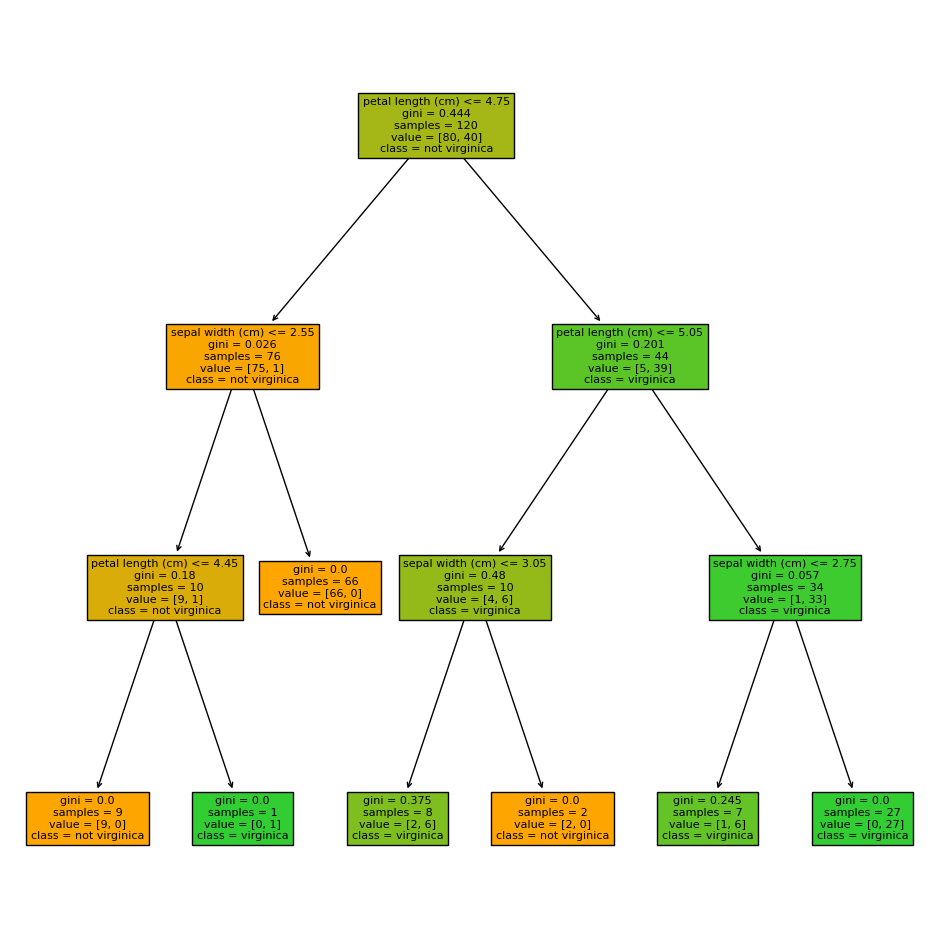

In [33]:
from sklearn.tree import plot_tree
from matplotlib.colors import to_rgb

colors = ['orange', 'limegreen']

plt.figure(figsize=(12, 12))

# сохраним список аннотаций в переменной node_list
node_list = plot_tree(tree_clf, 
                # filled=True,
                class_names=("not "+ class_name, class_name), 
                feature_names=feature_names)

# соберем итератор, содержащий объекты аннотаций, impurity и value
collection = zip(node_list, tree_clf.tree_.impurity, tree_clf.tree_.value)

# зададим значения цветов прямоугольникам узлов
for node, impurity, value in collection:
    c = colors.copy()
    color_1 = to_rgb(c.pop(np.argmax(value)))   # цвет преобладающего класса
    color_2 = to_rgb(c.pop())                   # цвет второстепенного класса
    
    # результирующий цвет с учетоом impurity 
    color = (color_1[0] * (1-impurity) + color_2[0] * impurity, 
             color_1[1] * (1-impurity) + color_2[1] * impurity, 
             color_1[2] * (1-impurity) + color_2[2] * impurity,
             )
    # задаем цвет текущему прямоугольнику
    node.get_bbox_patch().set_facecolor(color)

- **samples** количество тренировочных экземпляров, относящихся к узлу
- **values** показывает распределение этих экземпляров по меткам
- **gini** измеряет примесь (*impurity*) экземпляров другого класса в листьях:
<span style="color: #fba">$$ G = 1 - (p_1^2 + p_2^2) $$</span>
где $p_k$ - доля элементов $k$-го класса из общего числа samples данного узла

#### Визуализация решающей границы

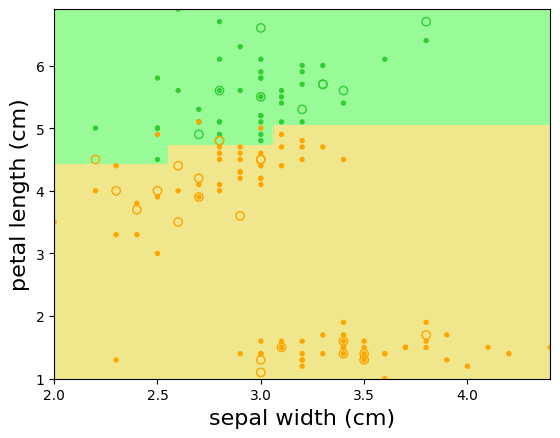

In [34]:
# найдем граничные значения признаков
x_min, y_min = np.min(X_reduced, axis=0)
x_max, y_max = np.max(X_reduced, axis=0)

resolution = 200    # число, на которое будет разбиваться диапазон

# создаются массивы значений для осей абсцисс и ординат
x_values = np.linspace(x_min, x_max, resolution)
y_values = np.linspace(y_min, y_max, resolution)
x_grid, y_grid = np.meshgrid(x_values, y_values)

z_grid = np.zeros_like(x_grid, dtype=np.int8)

# генерируются метки для соответствуюхи пар признаков и
# записываются в массив z_grid
for i in range(resolution):
    for j in range(resolution):
        instance = np.array([[x_grid[i, j], y_grid[i, j]]])
        z_grid[i, j] = tree_clf.predict(instance)


plt.contourf(x_grid, y_grid, z_grid, colors=['khaki', 'palegreen'])

c = [colors[1] if y_train[i]==1 else colors[0] for i in range(len(y_train))]
plt.scatter(X_train[:, 0], X_train[:, 1], c=c, s=8)

c = [colors[1] if y_test[i]==1 else colors[0] for i in range(len(y_test))]
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=c, facecolors='none')

plt.xlabel(iris["feature_names"][feature_indices[0]], fontsize=16)
plt.ylabel(iris["feature_names"][feature_indices[1]], fontsize=16)
plt.show()

#### Оценка модели

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_train_pred = tree_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print(f"Train set:\n{accuracy = }\n{recall = }\n{precision = }\n{f1 = }")

Train set:
accuracy = 0.975
recall = 1.0
precision = 0.9302325581395349
f1 = 0.963855421686747


In [36]:
y_test_pred = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f"Test set:\n{accuracy = }\n{recall = }\n{precision = }\n{f1 = }")

Test set:
accuracy = 0.9333333333333333
recall = 1.0
precision = 0.8333333333333334
f1 = 0.9090909090909091


### Многоклассовая классификация

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=40)

X_train.shape, y_train.shape

((75, 4), (75,))

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Визуализация дерева

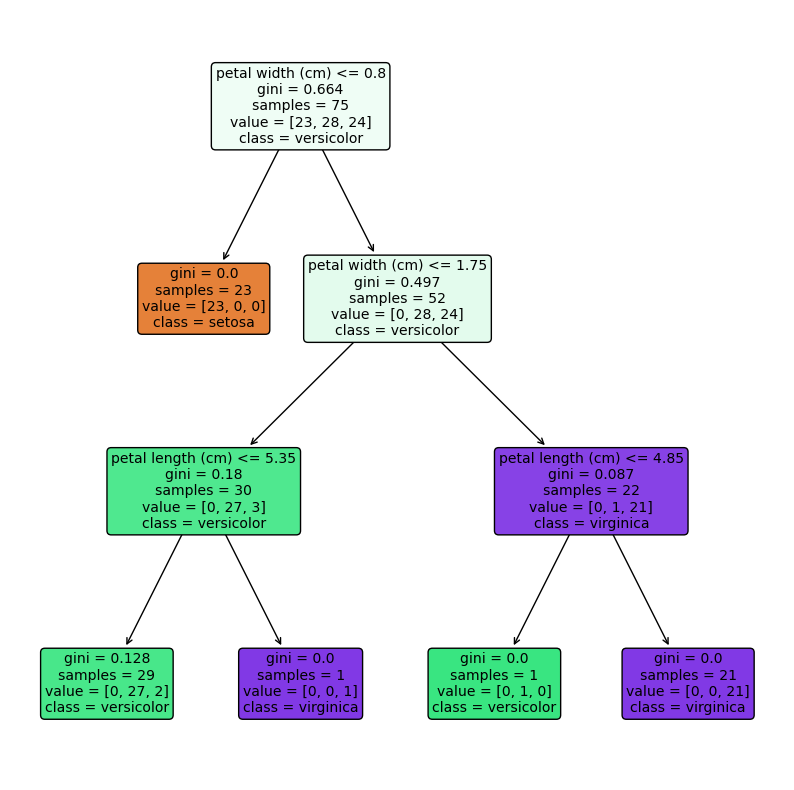

In [47]:
plt.figure(figsize=(10, 10))                    # зададим размер изображения
plot_tree(tree_clf,                             # объект модели
          filled=True,                          # закрасить узлы
          feature_names=iris["feature_names"],  # названия признаков
          class_names=iris["target_names"],     # названия классов
          rounded=True                          # закруглить прямоугольники
          )
plt.show()

#### Оценка модели

In [48]:
from sklearn.metrics import accuracy_score

y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Верность модели:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Accuracy:\n{train_acc = :.2}\n{test_acc = :.2}")

Accuracy:
train_acc = 0.97
test_acc = 0.96


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm  # матрица неточностей

array([[27,  0,  0],
       [ 0, 22,  0],
       [ 0,  3, 23]], dtype=int64)

In [50]:
from sklearn.metrics import recall_score, precision_score, f1_score


recall = recall_score(y_train, y_train_pred, average="macro")
precision = precision_score(y_train, y_train_pred, average="macro")
f1 = f1_score(y_train, y_train_pred, average="macro")
print(f"Train:\n{recall = }\n{precision = }\n{f1 = }")

Train:
recall = 0.9722222222222222
precision = 0.9777777777777779
f1 = 0.9740129935032483


In [51]:
recall = recall_score(y_test, y_test_pred, average="macro")
precision = precision_score(y_test, y_test_pred, average="macro")
f1 = f1_score(y_test, y_test_pred, average="macro")
print(f"Test:\n{recall = }\n{precision = }\n{f1 = }")

Test:
recall = 0.9615384615384616
precision = 0.96
f1 = 0.958315240990013
